In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

/usr/lib/python3/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/lib/python3/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
restaurant_dataframe = pd.read_csv('/home/seth/Documents/Masters/Data716/Thesis/sources/raw_data/nyc_restaurant_inspection_results.csv')
rodent_dataframe = pd.read_csv('/home/seth/Documents/Masters/Data716/Thesis/sources/raw_data/rodent_inspection.csv')

In [3]:
restaurant_dataframe.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')

In [3]:
# get all restaurants that were inspected in 2021
restaurant_df = restaurant_dataframe[restaurant_dataframe['GRADE DATE'].str.contains('2021', na=False)]

In [11]:
# Check if there are any restauratns that don't have a score. There aren't any (see output)
restaurant_df['SCORE'].isna().sum()

0

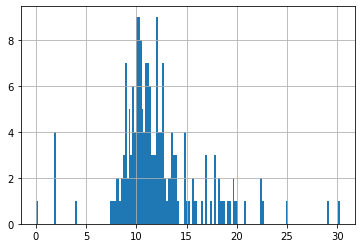

In [14]:
# see the distribution of the average restaurant scores grouped by zipcode where each column is a zipcode. It looks normal enough
restaurant_df.groupby('ZIPCODE')['SCORE'].mean().hist(bins=164)

In [24]:
rodent_dataframe.columns

Index(['INSPECTION_TYPE', 'JOB_TICKET_OR_WORK_ORDER_ID', 'JOB_ID',
       'JOB_PROGRESS', 'BBL', 'BORO_CODE', 'BLOCK', 'LOT', 'HOUSE_NUMBER',
       'STREET_NAME', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE',
       'LONGITUDE', 'BOROUGH', 'INSPECTION_DATE', 'RESULT', 'APPROVED_DATE',
       'LOCATION'],
      dtype='object')

In [15]:
# all reported rodent sightings in 2021, even if the inspection did not result in "Rat Activity"
rodent_df_all = rodent_dataframe[rodent_dataframe['INSPECTION_DATE'].str.contains('2021', na=False)]
# all reported rodent sightings in 2021 where the inspection resulted in "Rat Activity"
rodent_df_activity = rodent_dataframe[(rodent_dataframe['INSPECTION_DATE'].str.contains('2021', na=False)) & (rodent_dataframe['RESULT']=='Rat Activity')]

In [16]:
# Finding a unique key for the rows
rodent_df_all['JOB_TICKET_OR_WORK_ORDER_ID'].isna().sum()

0

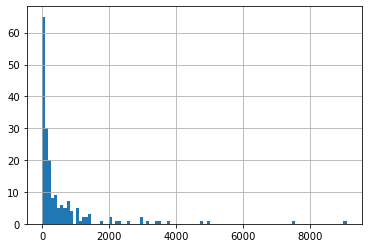

In [18]:
rodent_df_all.groupby('ZIP_CODE')['JOB_TICKET_OR_WORK_ORDER_ID'].count().hist(bins=100)

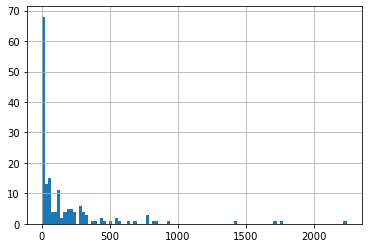

In [19]:
rodent_df_activity.groupby('ZIP_CODE')['JOB_TICKET_OR_WORK_ORDER_ID'].count().hist(bins=100)

In [30]:
rodent_df_activity.groupby('ZIP_CODE')['JOB_TICKET_OR_WORK_ORDER_ID'].count().head()

ZIP_CODE
0.0          1
10001.0    116
10002.0    695
10003.0    332
10004.0     13
Name: JOB_TICKET_OR_WORK_ORDER_ID, dtype: int64

In [32]:
combined_data = pd.merge(
    left=rodent_df_activity.groupby('ZIP_CODE')['JOB_TICKET_OR_WORK_ORDER_ID'].count().reset_index(name='count'),
    right=restaurant_df.groupby('ZIPCODE')['SCORE'].mean().reset_index(name='avg_score'),
    how="inner",
    on=None,
    left_on='ZIP_CODE',
    right_on='ZIPCODE',
    left_index=False,
    right_index=False,
    sort=True,
    validate="1:1")

In [33]:
combined_data.head()

,ZIP_CODE,count,ZIPCODE,avg_score
0,10001.0,116,10001.0,14.866071
1,10002.0,695,10002.0,11.264706
2,10003.0,332,10003.0,14.000000
3,10004.0,13,10004.0,13.512821
4,10005.0,7,10005.0,18.285714
